In [132]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from pprint import pprint as p

In [133]:
url = 'http://arena.siesgst.ac.in/contest/GSL02/status'

res = requests.get(url=url)
soup = BeautifulSoup(res.content, "html.parser")

In [134]:
results = soup.find_all('div', class_='d-flex justify-content-center')
# print(results, "\n\n")

res = str(results).count("<a ")
print(res)

6


In [135]:

def table_data(soup):
    global df
    for t in soup.find_all('tr'):
        try:
            username = t.find_all('td')[2].text
            problem = t.find_all('td')[3].text
            verdict = t.find_all('td')[4].text
            language = t.find_all('td')[5].text
            time = t.find_all('td')[6].text
            memory = t.find_all('td')[7].text
            print(username, problem, verdict, language, time, memory)
            df = df.append({'username': username, 'problem': problem, 'verdict': verdict,
                           'language': language, 'time': time, 'memory': memory}, ignore_index=True)

        except:
            pass

In [136]:
df = pd.DataFrame(columns=['username', 'problem',
                  'verdict', 'language', 'time', 'memory'])

In [137]:
for i in range(res):
    url = 'http://arena.siesgst.ac.in/contest/GSL02/status?page=' + str(i)
    res = requests.get(url=url)
    soup = BeautifulSoup(res.content, "html.parser")
    table_data(soup)

 suryamadhavan Boxes and Colours  Runtime Error   Python3  0.016867s  2 KB
 sravya Chloe Loves Flowers   Accepted   Python3  0.017014s  2 KB
 jsnehal1 Hide n Seek   Wrong Answer   Python3  0.024723s  2888 KB
 msarvesh Chloe Loves Flowers   Runtime Error   Python3  0.017152s  2 KB
 msarvesh Chloe Loves Flowers   Runtime Error   Python3  0.016651s  2 KB
 msarvesh Chloe Loves Flowers   Runtime Error   Python3  0.017077s  2 KB
 suryamadhavan Boxes and Colours   Wrong Answer   C++  0.008596s  2 KB
 suryamadhavan Hide n Seek  Accepted   C++  0.008614s  2 KB
 lats_123 Interesting Discount  Runtime Error   C++  0.017877s  2 KB
 bhaktig Chloe Loves Flowers    Compilation Error   Python3  0s  0KB
 Shashank-Deep Chloe Loves Flowers    Wrong Answer   C  0.010321s  2 KB
 SRiVARi Hide n Seek   Wrong Answer   Python3  0.025756s  2888 KB
 Sucharya01 Chloe Loves Flowers   Accepted   Python3  0.030186s  2888 KB
 SRiVARi Hide n Seek   Wrong Answer   Python3  0.02566s  2888 KB
 SRiVARi Hide n Seek   Wrong

In [138]:

df.to_csv('GSL02.csv', index=False)

In [139]:
# load the data
df = pd.read_csv('GSL02.csv')
df.head()

,username,problem,verdict,language,time,memory
0,suryamadhavan,Boxes and Colours,Runtime Error,Python3,0.016867s,2 KB
1,sravya,Chloe Loves Flowers,Accepted,Python3,0.017014s,2 KB
2,jsnehal1,Hide n Seek,Wrong Answer,Python3,0.024723s,2888 KB
3,msarvesh,Chloe Loves Flowers,Runtime Error,Python3,0.017152s,2 KB
4,msarvesh,Chloe Loves Flowers,Runtime Error,Python3,0.016651s,2 KB


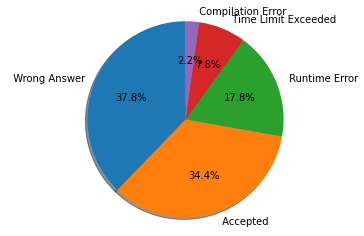

In [140]:
import matplotlib.pyplot as plt
# pie chart
labels = df['verdict'].value_counts().index
sizes = df['verdict'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()


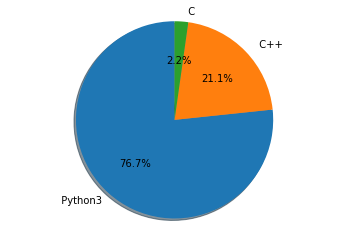

In [141]:
# pie chart based on language
labels = df['language'].value_counts().index
sizes = df['language'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

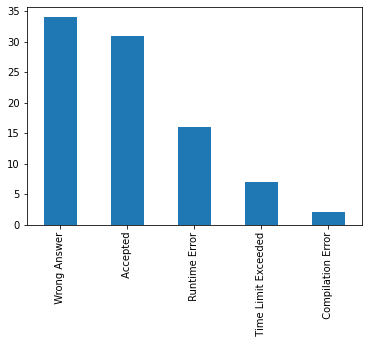

In [142]:
# bar chart for accpeted vs problem
df['verdict'].value_counts().plot(kind='bar')
plt.show()

In [143]:
df.dtypes

username    object
problem     object
verdict     object
language    object
time        object
memory      object
dtype: object

In [144]:
df['verdict'] = df['verdict'].astype("string")

In [145]:
df.dtypes

username    object
problem     object
verdict     string
language    object
time        object
memory      object
dtype: object

In [146]:
df.head()

,username,problem,verdict,language,time,memory
0,suryamadhavan,Boxes and Colours,Runtime Error,Python3,0.016867s,2 KB
1,sravya,Chloe Loves Flowers,Accepted,Python3,0.017014s,2 KB
2,jsnehal1,Hide n Seek,Wrong Answer,Python3,0.024723s,2888 KB
3,msarvesh,Chloe Loves Flowers,Runtime Error,Python3,0.017152s,2 KB
4,msarvesh,Chloe Loves Flowers,Runtime Error,Python3,0.016651s,2 KB


In [149]:
df[df['verdict'].str.contains("Accepted")]

,username,problem,verdict,language,time,memory
1,sravya,Chloe Loves Flowers,Accepted,Python3,0.017014s,2 KB
7,suryamadhavan,Hide n Seek,Accepted,C++,0.008614s,2 KB
12,Sucharya01,Chloe Loves Flowers,Accepted,Python3,0.030186s,2888 KB
16,sravya,Chloe Loves Flowers,Accepted,Python3,0.017014s,2 KB
22,suryamadhavan,Hide n Seek,Accepted,C++,0.008614s,2 KB
27,Sucharya01,Chloe Loves Flowers,Accepted,Python3,0.030186s,2888 KB
30,SRiVARi,Chloe Loves Flowers,Accepted,Python3,0.017402s,2 KB
31,jsnehal1,Interesting Discount,Accepted,Python3,0.030079s,2888 KB
33,Ronnie468,Interesting Discount,Accepted,Python3,0.016512s,2 KB
34,Prathamesh,Hide n Seek,Accepted,C++,0.009616s,2 KB


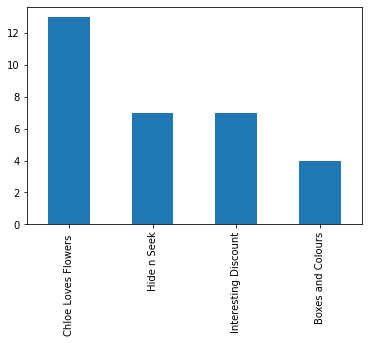

In [154]:
# Bar chart for accpeted vs problem
verdict_accpeted = df[df['verdict'].str.contains("Accepted")]
verdict_accpeted['problem'].value_counts().plot(kind='bar')
plt.show()

In [172]:
df.dtypes

username     object
problem      object
verdict      string
language     object
time        float64
memory       object
dtype: object

In [160]:
df['time']=df['time'].astype("string")

In [165]:
df['time']=df['time'].str.replace('s','')

In [167]:
df.head()

,username,problem,verdict,language,time,memory
0,suryamadhavan,Boxes and Colours,Runtime Error,Python3,0.016867,2 KB
1,sravya,Chloe Loves Flowers,Accepted,Python3,0.017014,2 KB
2,jsnehal1,Hide n Seek,Wrong Answer,Python3,0.024723,2888 KB
3,msarvesh,Chloe Loves Flowers,Runtime Error,Python3,0.017152,2 KB
4,msarvesh,Chloe Loves Flowers,Runtime Error,Python3,0.016651,2 KB


In [169]:
df['time']=df['time'].astype("float")

In [198]:
df.dtypes

username     string
problem      object
verdict      string
language     object
time        float64
memory       object
dtype: object

In [179]:
# Effient time with respect to problem
prob = df['problem'].unique()
print(len(prob))

4


In [196]:
df['username'] = df['username'].astype("string")

In [217]:

for i in prob:
    global df_et
    Effient_time = df[df['verdict'].str.contains("Accepted") & df['problem'].str.contains(i)]['time'].min()
    Effient_memory = df[df['verdict'].str.contains("Accepted") & df['problem'].str.contains(i)]['memory'].min()
    # print(i, Effient_time, Effient_memory)
    user_name_et = df[df['time'] == Effient_time]['username'].astype("string").iloc[0]
    user_name_em = df[df['memory'] == Effient_memory]['username'].astype("string").iloc[0]
    print(i,user_name_et, user_name_em)
    


Boxes and Colours  Prathamesh  suryamadhavan
Chloe Loves Flowers   sravya  suryamadhavan
Hide n Seek  suryamadhavan  suryamadhavan
Interesting Discount  Ronnie468  suryamadhavan
